In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('2019-XTern- Work Sample Assessment Data Science-DS.csv')
df.head(3)

,scooter_id,xcoordinate,ycoordinate,power_level
0,0,0.906835,0.776484,0
1,1,0.928587,0.804964,2
2,2,0.904091,0.784043,1


In [5]:
[x, y] = df.shape
print('There are ', x, 'records and ', y, 'features.')

There are  25668 records and  4 features.


In [6]:
xMax =  df.xcoordinate.max()
xMin = df.xcoordinate.min()
yMax = df.ycoordinate.max()
yMin = df.ycoordinate.min()

In [7]:
print('X coord. placement ranges from ', xMin, 'to ', xMax)
print('Y coord. placement ranges from ', yMin, 'to ', yMax)

X coord. placement ranges from  -0.300061531 to  1.3695174959999998
Y coord. placement ranges from  -0.290196054 to  1.357176427


An initial look at the data suggests the bus station isn't very close to any of the scooter locations

##  Finding most popular scooter location:

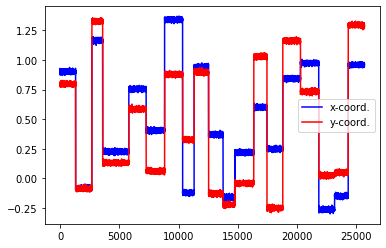

In [29]:
plt.plot(df.scooter_id, df.xcoordinate, color = 'b',label='x-coord.')
plt.plot(df.scooter_id, df.ycoordinate, color = 'r', label = 'y-coord.')
plt.legend(loc = 'best')

This graph indicates the scooters are left in geographical clusters. This could be useful in developing a charging strategy. It looks like there are 19 scooter 'hubs' overall. 

Additionally, this graph indicates the most popular scooter location is around 0.25 (X coordinate), 0.125 (Y coordinate). 

## Finding Operation Time Cost: 

In [36]:
# I want to know the time to full charge for each of the scooters. Here's a vector with those values
time_to_full = 5-df.power_level
#Looking at the values
time_to_full.value_counts()

5    4388
0    4343
1    4284
4    4248
3    4245
2    4160
Name: power_level, dtype: int64

In [38]:
# The average time neede to charge, assuming one hour of charging = one power level gained
print(time_to_full.mean(), 'hours')

2.503934860526726 hours


So, on average scooters require 2.5 hours before being fully charged. But as for total time...

In [35]:
#The total time to full charge of all scooters
print(time_to_full.sum(),'hours')

64271 hours


## Developing a Charging Strategy

I'm interested in the distance of a scooter from the bus at it's initial station.

In [19]:
bus_x = 20.19
bus_y = 20.19
distance_from_station = np.sqrt((bus_x - df.xcoordinate)**2 + (bus_y - df.ycoordinate)**2)

In [21]:
#I will make this distance a new feature
df['distance_from_station'] = distance_from_station
df.head(3)

,scooter_id,xcoordinate,ycoordinate,power_level,distance_from_station
0,0,0.906835,0.776484,0,27.362841
1,1,0.928587,0.804964,2,27.327306
2,2,0.904091,0.784043,1,27.359412


In [25]:
print('The average distance form the station is', df.distance_from_station.mean(), 'miles')

The average distance form the station is 27.897126182359216 miles


In [39]:
disMax = df.distance_from_station.max()
disMin = df.distance_from_station.min()
print('Max distance:', disMax,' Min distance:', disMin)

Max distance: 28.85182478901359  Min distance: 26.75700023626647


None of the hubs are more than 29 miles away from the bus station, but none are less than  26 miles away.

I'm  also  interested in the distance of the hubs from each other.

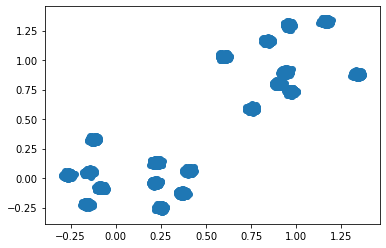

In [43]:
# I want to make a plot somewhat representative of the different hub locations
plt.scatter(df.xcoordinate, df.ycoordinate)

This plot shows the 19 hubs in a more geographical way. There even seems to be sub-clusters - one sort of sparse in the upper right of the graph, with two more consolidates ones at the bottom  left. 

The majority of the hubs are those in the upper right cluster, these would also be the closest ones to the station.

In [45]:
ix = distance_from_station.idxmin()
ix

3027

In [47]:
df.iloc[ix, :]

scooter_id               3027.000000
xcoordinate                 1.188913
ycoordinate                 1.351323
power_level                 2.000000
distance_from_station      26.757000
Name: 3027, dtype: float64

So, the closest scooter to the station is # 3027, which we can see is in the upper right cluster. 

I propose a charging strategy in which the bus leaves the station and charges the scooters at each hub, driving to each of them in a loop. Beginning with the closest hub, the bus will remain there for 2.5 hours (the average charging time needed for a given scooter) to charge the scooters, then move on to the next station in the loop. This way, although not all scooters will be fully charged after every bus stop, they will have a decent battery life left and there will be a regular and predictable schedule for charging. This is assuming that one hour of charge time equates to one increase in power level. This is also assuming the bus is able to hold all of the scooters at a hub at one time. 

In [55]:
# Here's an example loop schedule:
from tensorflow.keras.preprocessing import image
image = image.load_img('Capture.PNG', target_size = (400,400))

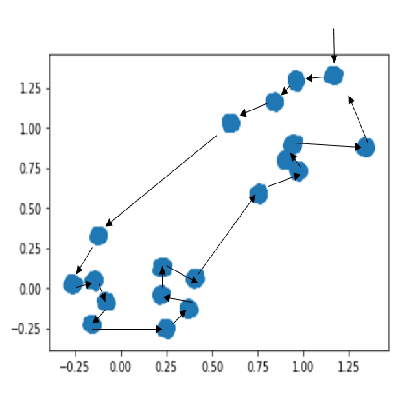

In [56]:
image